<a href="https://colab.research.google.com/github/aleinadrc21/practicas/blob/main/SimulacionMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

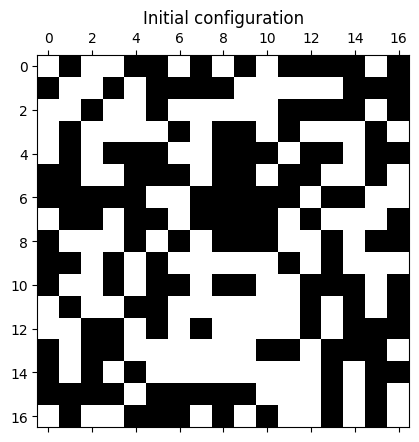

para Temperatura=  5  E_promedio =  -0.814558246828143  Magnetización_promedio =  -0.05580680507497116  Calor_especifico=  0.09405400505959252 Suceptibilidad =  0.3185477696078432


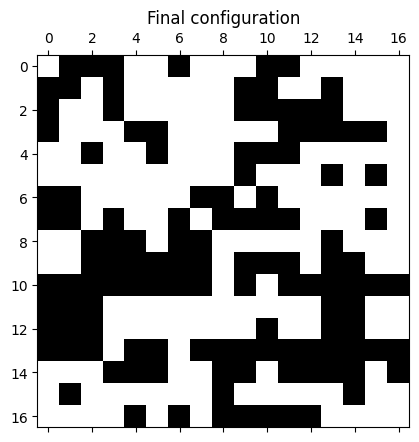

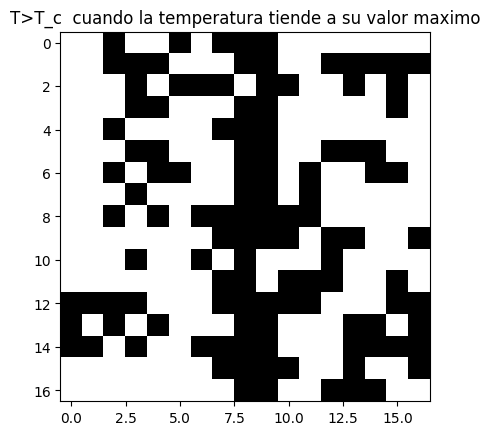

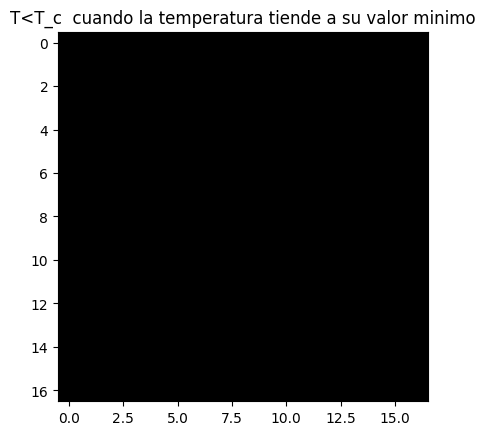

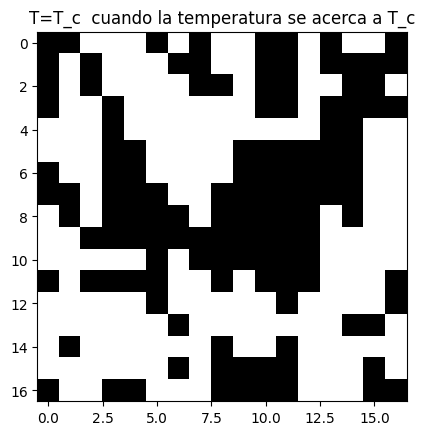

para Temperatura=  5  E_promedio =  -0.814558246828143  Magnetización_promedio =  -0.05580680507497116  Calor_especifico=  0.09405400505959252 Suceptibilidad =  0.3185477696078432


In [154]:
#importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
#para guardar variables.
import copy
#para trabajar de forma aleatoria
import random

#parametros iniciales

# Tamaño de la red
N = 17
J = 1
kb=1
nsteps = 12000
#semilla a utlizar=22
generador_de_números_aleatorios= random.seed(20)
gen = np.random.seed(20) 

# Crear la red inicial de espines aleatorios de tamaño NxN con valores aleatorios entre 1 y -1
config=2*np.random.randint(2, size=(N,N))-1
#ya que la configuracion de spines cambia hacemos una copia y guardamos para graficar al final.
initial_conf = copy.deepcopy(config)

#el estado inicial es
plt.matshow(initial_conf, cmap='gray')
plt.title('Initial configuration')
plt.show()

# Lista de temperaturas (tendremos 48 temperaturas cariando de 0.1 a 5.0)
temperatures = [0.01, 0.05, 0.09, 1, 1.2, 1.4, 1.5, 1.59, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.19, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.19, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 4.99, 5]

def energy(config): #Calculamos la energia de la configuracion actual.
#Comos se comenciono para este modelo se toma en cuenta los "vecinos" de cada espin
    ady = np.roll(config, 1, axis=0) + np.roll(config, -1, axis=0) + np.roll(config, 1, axis=1) + np.roll(config, -1, axis=1)
#la energia entonces se calcula basandonos en la formula de H
    energy = -J * np.sum(config * ady/2)
    return energy

def mag(config):#función de magnetización
    return np.sum(config)

#iniciaremos con la simulación
#explicacion del algoritmo metropolis y como nos ayuda en esta parte
#aqui vamos a cambiar el valor del spin de una ubicación específica en la red que se selecciona al azar.
prom_E = []  # Lista para almacenar los valores que van cambiando con forme T aumenta
prom_mag = []
Specific_Heat = []
Susceptibility = []
for Tem in temperatures:  #iremos variando la temperatura
    energias = []
    magnetizaciones = []
    for step in range(nsteps):
     #para un spin aleatorio
        i, j = random.randint(0, N-1), random.randint(0, N-1)
        E_initial = energy(config)  #la energia de la configuracion 
        M_initial = mag(config)     #magnetizacion de la configuracion 
      #cambiamos el spin  
        config[i, j] *= -1
        E_final = energy(config)  #energia de la energia y magnetizacion actual
        M_final = mag(config)
        #calcular el cambio de energia 
        dE = E_final - E_initial
        #aplicar las condiciones para cuando dE tome valores positivos o negativos
        if dE <= 0 or np.exp(-dE /(kb*Tem)) > random.uniform(0, 1):
            energias.append(E_final)
            magnetizaciones.append(M_final)
        else:
            config[i, j] *= -1
            energias.append(E_initial)
            magnetizaciones.append(M_initial)

#ya tenemos los valores necesarios y guardados para realizar calculos


#calculamos el valor promedio de la energía por sitio en el sistema.
#recordamos que cada iteracion cuenta dos veces, para calcular las e promedio multiplicamos por 2
    prom_E.append(2*np.mean(energias)/N**2)
# de la misma forma para el valor promedio de la magnetizacion por sitio.
    prom_mag.append(np.mean(magnetizaciones)/N**2)

    Eprom = np.mean(energias)  #valor esperado de E
# para el calor especifico y la suceptibilidad recordamos

#definimos la funcion raiz cuadrada para simplificar calculos 
    raizcua = [enes**2 for enes in energias]
#Como ya tenemos el valor esperado de E, calculamos el valor esperado de E^2
    Eexp2 = np.mean(raizcua)
#calculamos C como en la formula     
    Specific_Heat.append((Eexp2-Eprom**2)/(N**2*kb*Tem**2))
#para la suceptibilidad recordamos la formula


 #Tenemos que calcular el valor esperado de la suceptibilidad y de la suceotibilidad al cuadrado
    raizmag = [mags**2 for mags in magnetizaciones]
    AbsMag = [abs(mm) for mm in magnetizaciones]
    Mprom = np.mean(AbsMag)
    M2prom = np.mean(raizmag)
 #aplicando la formula despejando para la suceptibilidad tenemos   
    Susceptibility.append((M2prom-Mprom**2)/(N**2*kb*Tem))


#graficamos estos valores 


#tabla de datos 
#Tabla de datos de cada variable cuando
print("para Temperatura= ", Tem, " E_promedio = ", 2*np.mean(energias)/N**2, " Magnetización_promedio = ", np.mean(magnetizaciones)/N**2 , " Calor_especifico= ", (Eexp2-Eprom**2)/(N**2*kb*Tem**2), "Suceptibilidad = ", (M2prom-Mprom**2)/(N**2*kb*Tem))
Specific_Heat[0]=0 
Susceptibility[0]=0


final_conf = copy.deepcopy(config)

#el estado final  es
plt.matshow(final_conf, cmap='gray')
plt.title('Final configuration')
plt.show()

#Para ver como varia la configuracion mientras se varía tenemos lo siguiente:

# Encontrar la temperatura con la energía promedio máxima
Tmax = temperatures[np.argmax(prom_E)]

# Encontrar la red de espines correspondiente a la temperatura máxima
spins_max = copy.deepcopy(initial_conf)
for step in range(nsteps):
    i, j = random.randint(0, N-1), random.randint(0, N-1)
    E = energy(spins_max)
    M = mag(spins_max)
    spins_max[i, j] *= -1
    Enew = energy(spins_max)
    Mnew = mag(spins_max)
    deltaE = Enew - E
    if deltaE <= 0 or np.exp(-deltaE /(kb*Tmax)) > random.uniform(0, 1):
        pass
    else:
        spins_max[i, j] *= -1

# Graficar la red de espines correspondiente a la temperatura máxima
plt.imshow(spins_max, cmap='gray')
plt.title(f"T>T_c  cuando la temperatura tiende a su valor maximo")
plt.show()

# Encontrar la temperatura con la energía promedio mínima
Tmin = temperatures[np.argmin(prom_E)]

# Encontramoa la red de espines correspondiente a la temperatura mínima
spins_min = copy.deepcopy(initial_conf)
for step in range(nsteps):
    i, j = random.randint(0, N-1), random.randint(0, N-1)
    E = energy(spins_min)
    M = mag(spins_min)
    spins_min[i, j] *= -1
    Enew = energy(spins_min)
    Mnew = mag(spins_min)
    deltaE = Enew - E
    if deltaE <= 0 or np.exp(-deltaE /(kb*Tmin)) > random.uniform(0, 1):
        pass
    else:
        spins_min[i, j] *= -1


# Graficar la red de espines correspondiente a la temperatura mínima
plt.imshow(spins_min, cmap='gray')
plt.title(f"T<T_c  cuando la temperatura tiende a su valor minimo")
plt.show()



# Encontrar la temperatura con la energía promedio mínima
T_avg = np.mean(temperatures)
# Red de espines para la temperatura promedio
spins_p = initial_conf
for step in range(nsteps):
    i, j = random.randint(0, N-1), random.randint(0, N-1)
    E = energy(spins_p)
    M = mag(spins_p)
    spins_p[i, j] *= -1
    Enew = energy(spins_p)
    Mnew = mag(spins_p)
    deltaE = Enew - E
    if deltaE <= 0 or np.exp(-deltaE /(kb*T_avg)) > random.uniform(0, 1):
        pass
    else:
        spins_p[i, j] *= -1
        

# Graficar la red de espines correspondiente a la temperatura promedio
plt.imshow(spins_p, cmap='gray')
plt.title(f"T=T_c  cuando la temperatura se acerca a T_c")
plt.show()

#Tabla de datos de cada variable cuando
print("para Temperatura= ", Tem, " E_promedio = ", 2*np.mean(energias)/N**2, " Magnetización_promedio = ", np.mean(magnetizaciones)/N**2 , " Calor_especifico= ", (Eexp2-Eprom**2)/(N**2*kb*Tem**2), "Suceptibilidad = ", (M2prom-Mprom**2)/(N**2*kb*Tem))
Specific_Heat[0]=0 
Susceptibility[0]=0




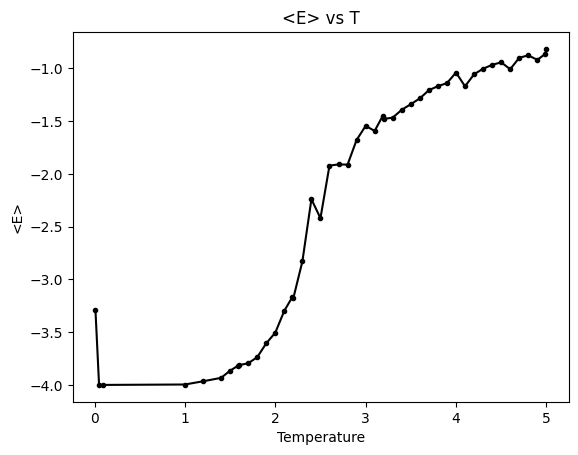

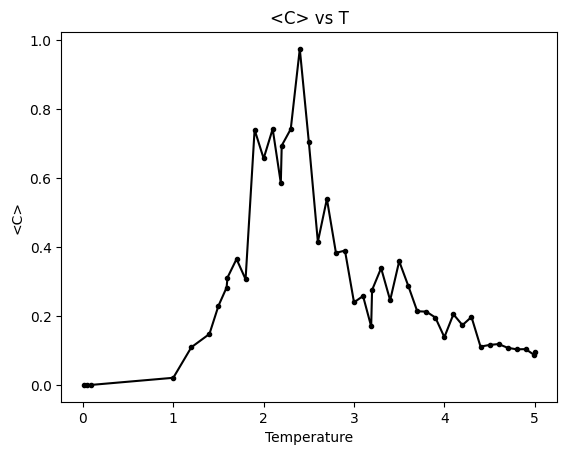

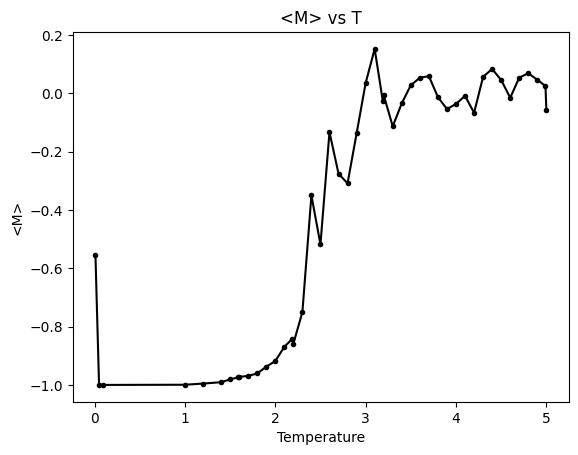

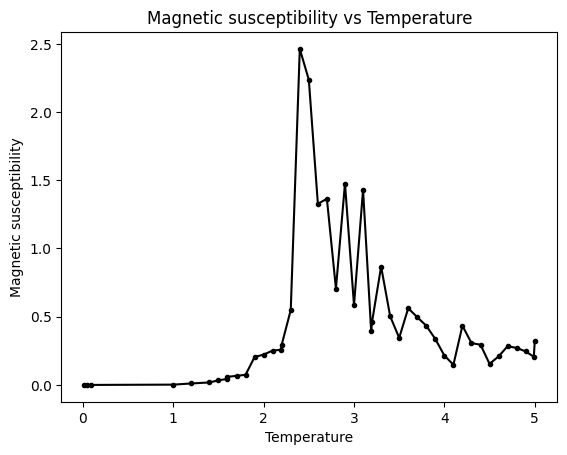

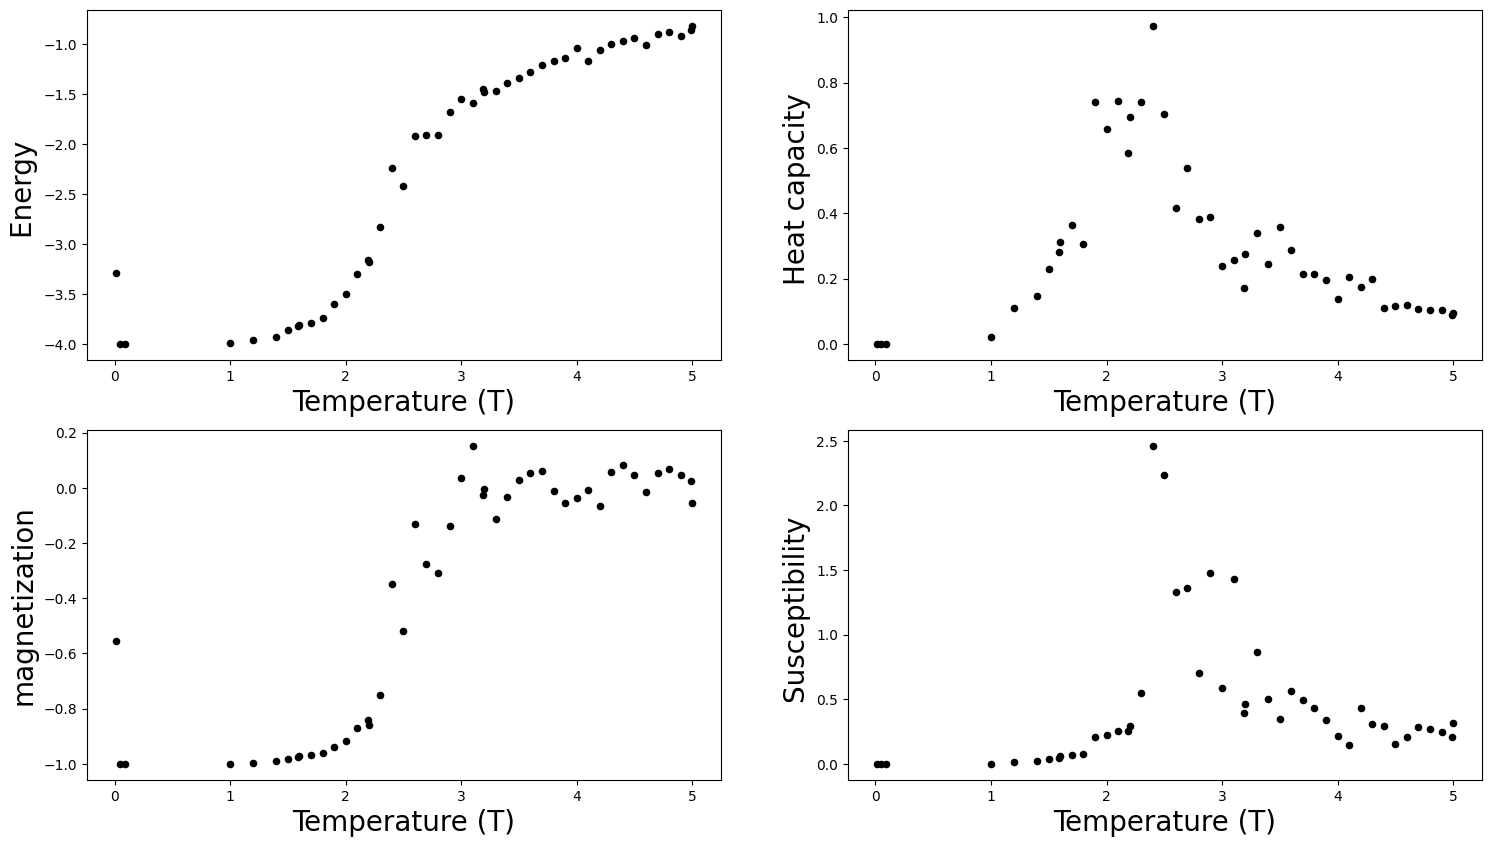

In [158]:

#graficas individuales
plt.plot(temperatures,prom_E, marker='o', markersize=3, color='k' )
plt.xlabel('Temperature')
plt.ylabel('<E>')
plt.title('<E> vs T')
plt.show()


plt.plot(temperatures, Specific_Heat, marker='o', markersize=3, color='k')
plt.xlabel('Temperature')
plt.ylabel('<C>')
plt.title('<C> vs T')
plt.show()

plt.plot(temperatures, prom_mag, marker='o', markersize=3, color='k')
plt.xlabel('Temperature')
plt.ylabel('<M>')
plt.title('<M> vs T')
plt.show()

plt.plot(temperatures, Susceptibility, marker='o', markersize=3, color='k')
plt.xlabel('Temperature')
plt.ylabel('Magnetic susceptibility')
plt.title('Magnetic susceptibility vs Temperature')
plt.show()



#graficas conjuntas

f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(temperatures, prom_E, s=20, marker='o', color='k')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(temperatures,Specific_Heat, s=20, marker='o', color='k')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Heat capacity ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(temperatures, prom_mag, s=20, marker='o', color='k')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("magnetization", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(temperatures, Susceptibility, s=20, marker='o', color='k')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility ", fontsize=20);         plt.axis('tight');
